<a href="https://colab.research.google.com/github/Polly2497/Acoustic-Event-Analysis/blob/master/Acoustic_Event_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.preprocessing import StandardScaler

# Загрузка данных

In [5]:
data_csv= pd.read_csv('C:/Users/e_shakhov/Desktop/dataset/train/train.csv')


In [6]:
for fname in data_csv['fname']:
  y, sr= librosa.load('C:/Users/e_shakhov/Desktop/dataset/train/' + fname)
  


# Расчет фичи с помощью  librosa- Mel и вывод спектрограммы

In [7]:
librosa.feature.melspectrogram(y=y, sr=sr)

array([[5.4050499e-04, 4.2283637e-04, 4.5756123e-04, ..., 6.5179361e-04,
        5.0215912e-04, 6.6223665e-04],
       [2.1322994e-03, 1.0298663e-03, 1.0206912e-04, ..., 2.3895833e-03,
        1.8529522e-03, 3.6388094e-04],
       [4.0944279e-03, 1.6288907e-03, 2.4623354e-04, ..., 2.3180079e-03,
        1.9818128e-03, 2.2111572e-03],
       ...,
       [1.7869334e-08, 4.4673225e-09, 1.6551752e-18, ..., 6.3573586e-18,
        3.0779362e-10, 3.1883118e-09],
       [1.7577841e-08, 4.3944492e-09, 8.7372400e-19, ..., 7.0628056e-18,
        2.9997865e-10, 3.1073606e-09],
       [1.7389144e-08, 4.3472750e-09, 7.3770490e-19, ..., 9.0118060e-18,
        2.9509978e-10, 3.0568228e-09]], dtype=float32)

In [8]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

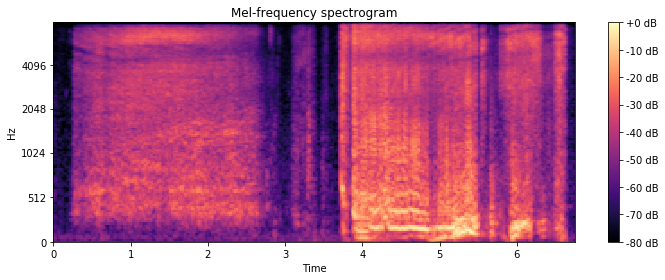

In [9]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [10]:
data_librosa = []
for fname in data_csv['fname']:
  y, sr= librosa.load('C:/Users/e_shakhov/Desktop/dataset/train/' + fname)
  data_mel= librosa.feature.melspectrogram(y=y, sr=sr)
  data_librosa.append(data_mel)

In [11]:
label=[]
for l in data_csv['label']:
    label = list(data_csv['label'])

# Сохранение расчитанных фич в pickle

In [12]:
with open('C:/Users/e_shakhov/Desktop/dataset/data_mel.pickle', 'wb') as f_d:
    pickle.dump(data_mel, f_d)

In [13]:
with open('C:/Users/e_shakhov/Desktop/dataset/data_mel.pickle', 'rb') as f:
    data_pickle = pickle.load(f)


In [14]:
with open('C:/Users/e_shakhov/Desktop/dataset/all_data_mel.pickle', 'wb') as f_d:
    pickle.dump(data_librosa, f_d)

In [15]:
with open('C:/Users/e_shakhov/Desktop/dataset/all_data_mel.pickle', 'rb') as f:
  all_data_pickle = pickle.load(f)

# Выравнивание данных

In [16]:
average=[]
for e in all_data_pickle:
  average.append(np.mean(e, axis=1))

In [17]:
with open('C:/Users/e_shakhov/Desktop/dataset/average_data.pickle', 'wb') as f_d:
    pickle.dump(average, f_d)

In [18]:
with open('C:/Users/e_shakhov/Desktop/dataset/average_data.pickle', 'rb') as f:
  average_data = pickle.load(f)

# Разбиение на train и test, обучение модели

In [19]:
train_data,test_data, train_label, test_label = train_test_split(average_data, label, stratify=label, test_size=0.2, random_state=42)

In [20]:
classifier = KNeighborsClassifier().fit(train_data, train_label)

# Предсказание для test и train, результаты

In [21]:
result = classifier.predict(test_data)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_label, result))

                       precision    recall  f1-score   support

      Acoustic_guitar       0.22      0.32      0.26        37
             Applause       0.28      0.81      0.42        37
                 Bark       0.19      0.31      0.24        29
            Bass_drum       0.50      0.81      0.62        36
Burping_or_eructation       0.12      0.22      0.16        23
                  Bus       0.00      0.00      0.00        13
                Cello       0.21      0.22      0.21        37
                Chime       0.24      0.38      0.29        16
             Clarinet       0.31      0.31      0.31        35
    Computer_keyboard       0.16      0.23      0.19        13
                Cough       0.09      0.12      0.10        33
              Cowbell       0.39      0.57      0.46        23
          Double_bass       0.31      0.34      0.33        38
 Drawer_open_or_close       0.12      0.11      0.11        19
       Electric_piano       0.12      0.06      0.08  

# Результаты на Train


In [23]:
y_pred_2 = classifier.predict(train_data)

In [24]:
print(classification_report(train_label, y_pred_2))

                       precision    recall  f1-score   support

      Acoustic_guitar       0.42      0.75      0.54       150
             Applause       0.34      0.91      0.50       146
                 Bark       0.31      0.47      0.37       118
            Bass_drum       0.53      0.90      0.67       145
Burping_or_eructation       0.42      0.62      0.50        90
                  Bus       0.23      0.27      0.25        51
                Cello       0.43      0.54      0.47       149
                Chime       0.42      0.56      0.48        62
             Clarinet       0.50      0.52      0.51       141
    Computer_keyboard       0.27      0.36      0.31        53
                Cough       0.35      0.45      0.40       130
              Cowbell       0.59      0.73      0.65        94
          Double_bass       0.62      0.65      0.63       153
 Drawer_open_or_close       0.30      0.28      0.29        75
       Electric_piano       0.50      0.23      0.32  

# Матрица путаницы для TEST

[[0.32 0.   0.03 ... 0.   0.03 0.  ]
 [0.   0.81 0.05 ... 0.   0.   0.  ]
 [0.   0.21 0.31 ... 0.   0.07 0.  ]
 ...
 [0.   0.18 0.05 ... 0.24 0.03 0.  ]
 [0.06 0.09 0.06 ... 0.   0.12 0.  ]
 [0.   0.03 0.06 ... 0.   0.   0.31]]


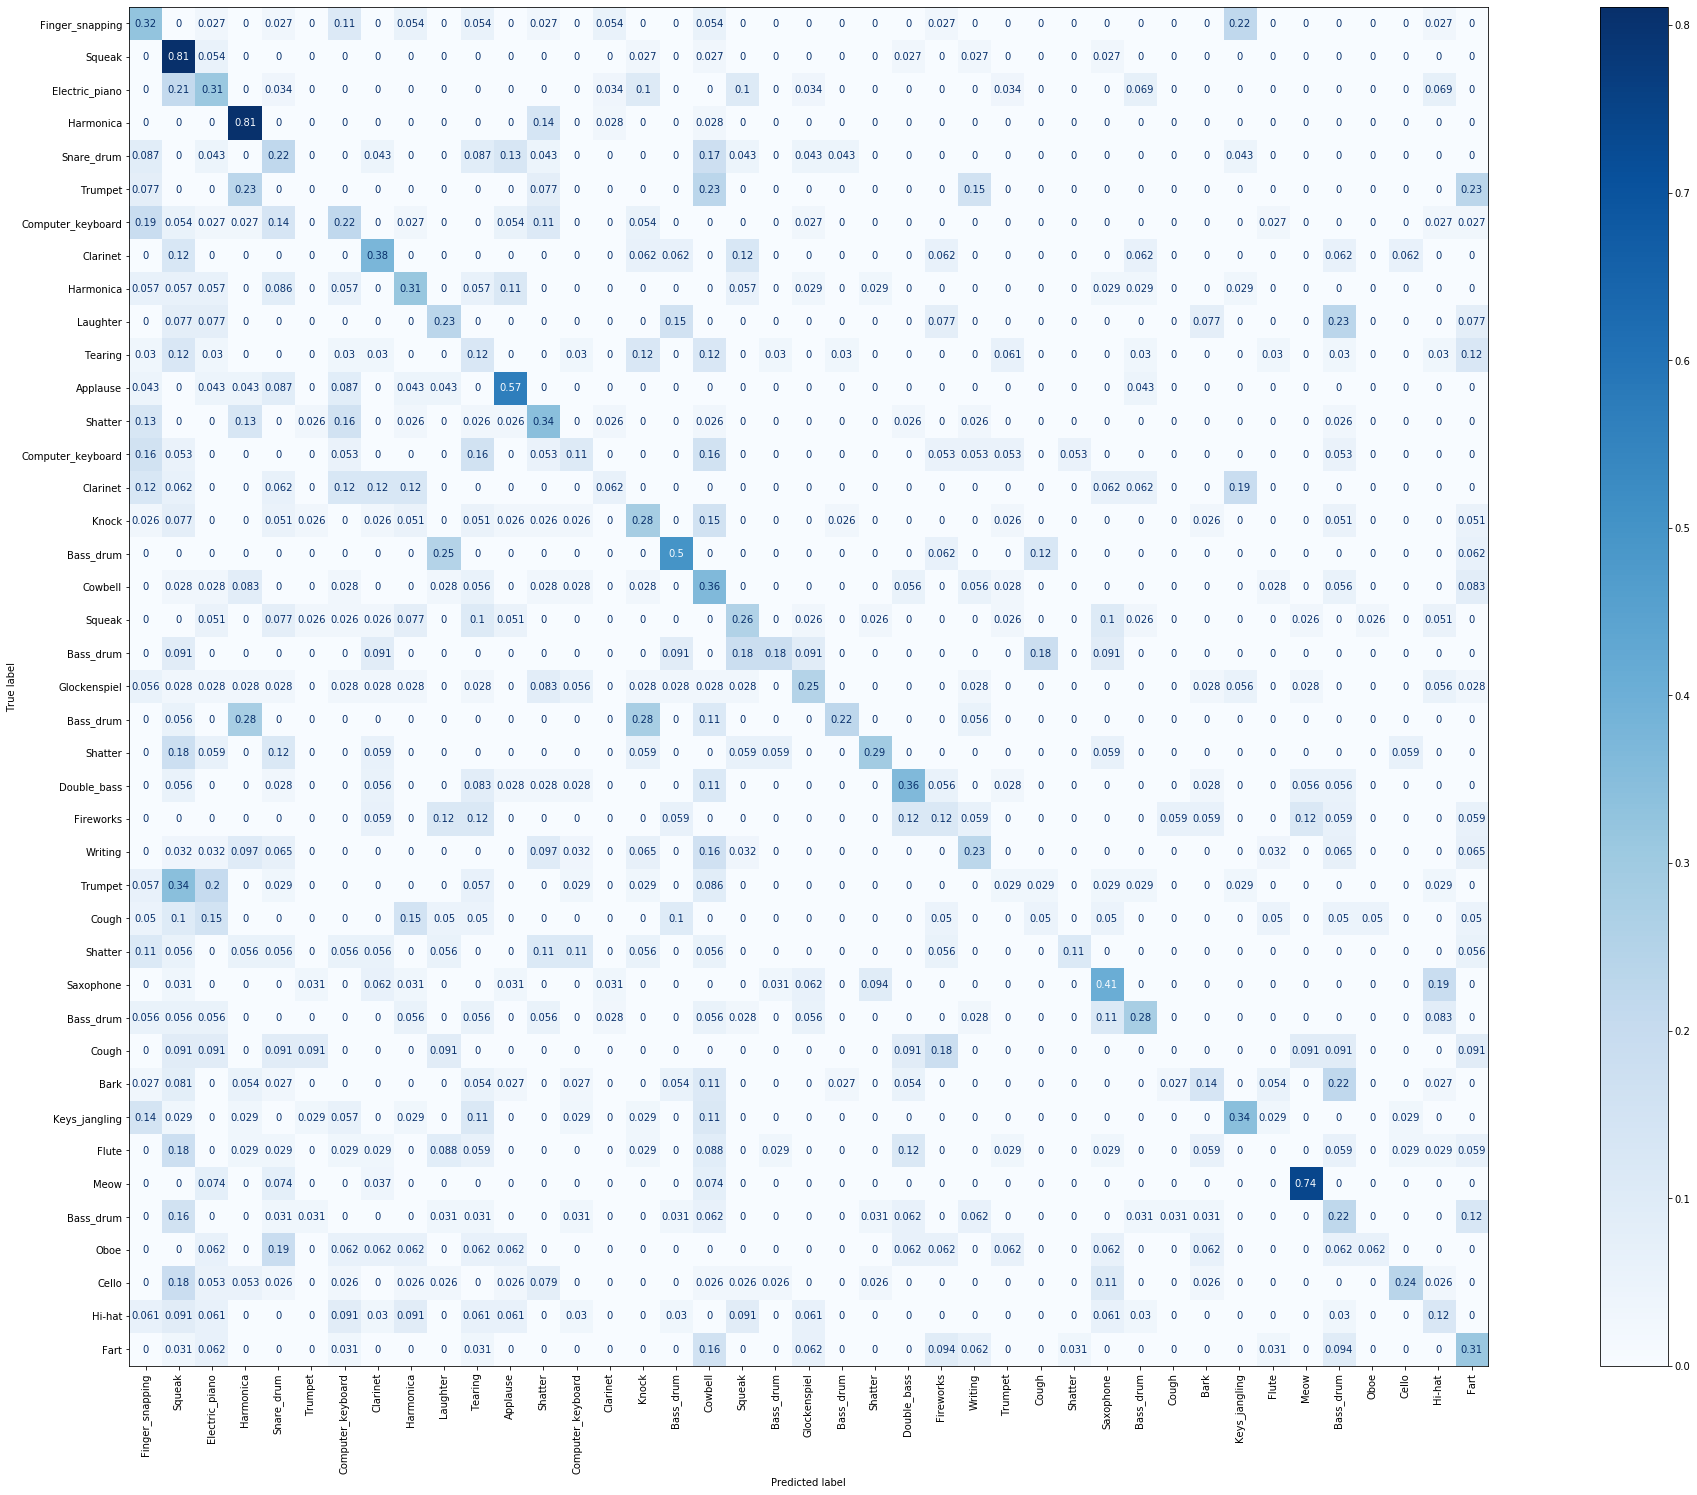

In [31]:
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier , test_data, test_label, display_labels=label,
                             cmap=plt.cm.Blues, xticks_rotation='vertical',
                             normalize='true') 


print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()

# Матрица путаницы для TRAIN

[[0.75 0.   0.   ... 0.   0.01 0.  ]
 [0.   0.91 0.04 ... 0.01 0.   0.01]
 [0.04 0.17 0.47 ... 0.   0.01 0.04]
 ...
 [0.02 0.13 0.01 ... 0.41 0.01 0.01]
 [0.07 0.01 0.03 ... 0.01 0.31 0.  ]
 [0.   0.05 0.02 ... 0.   0.   0.57]]


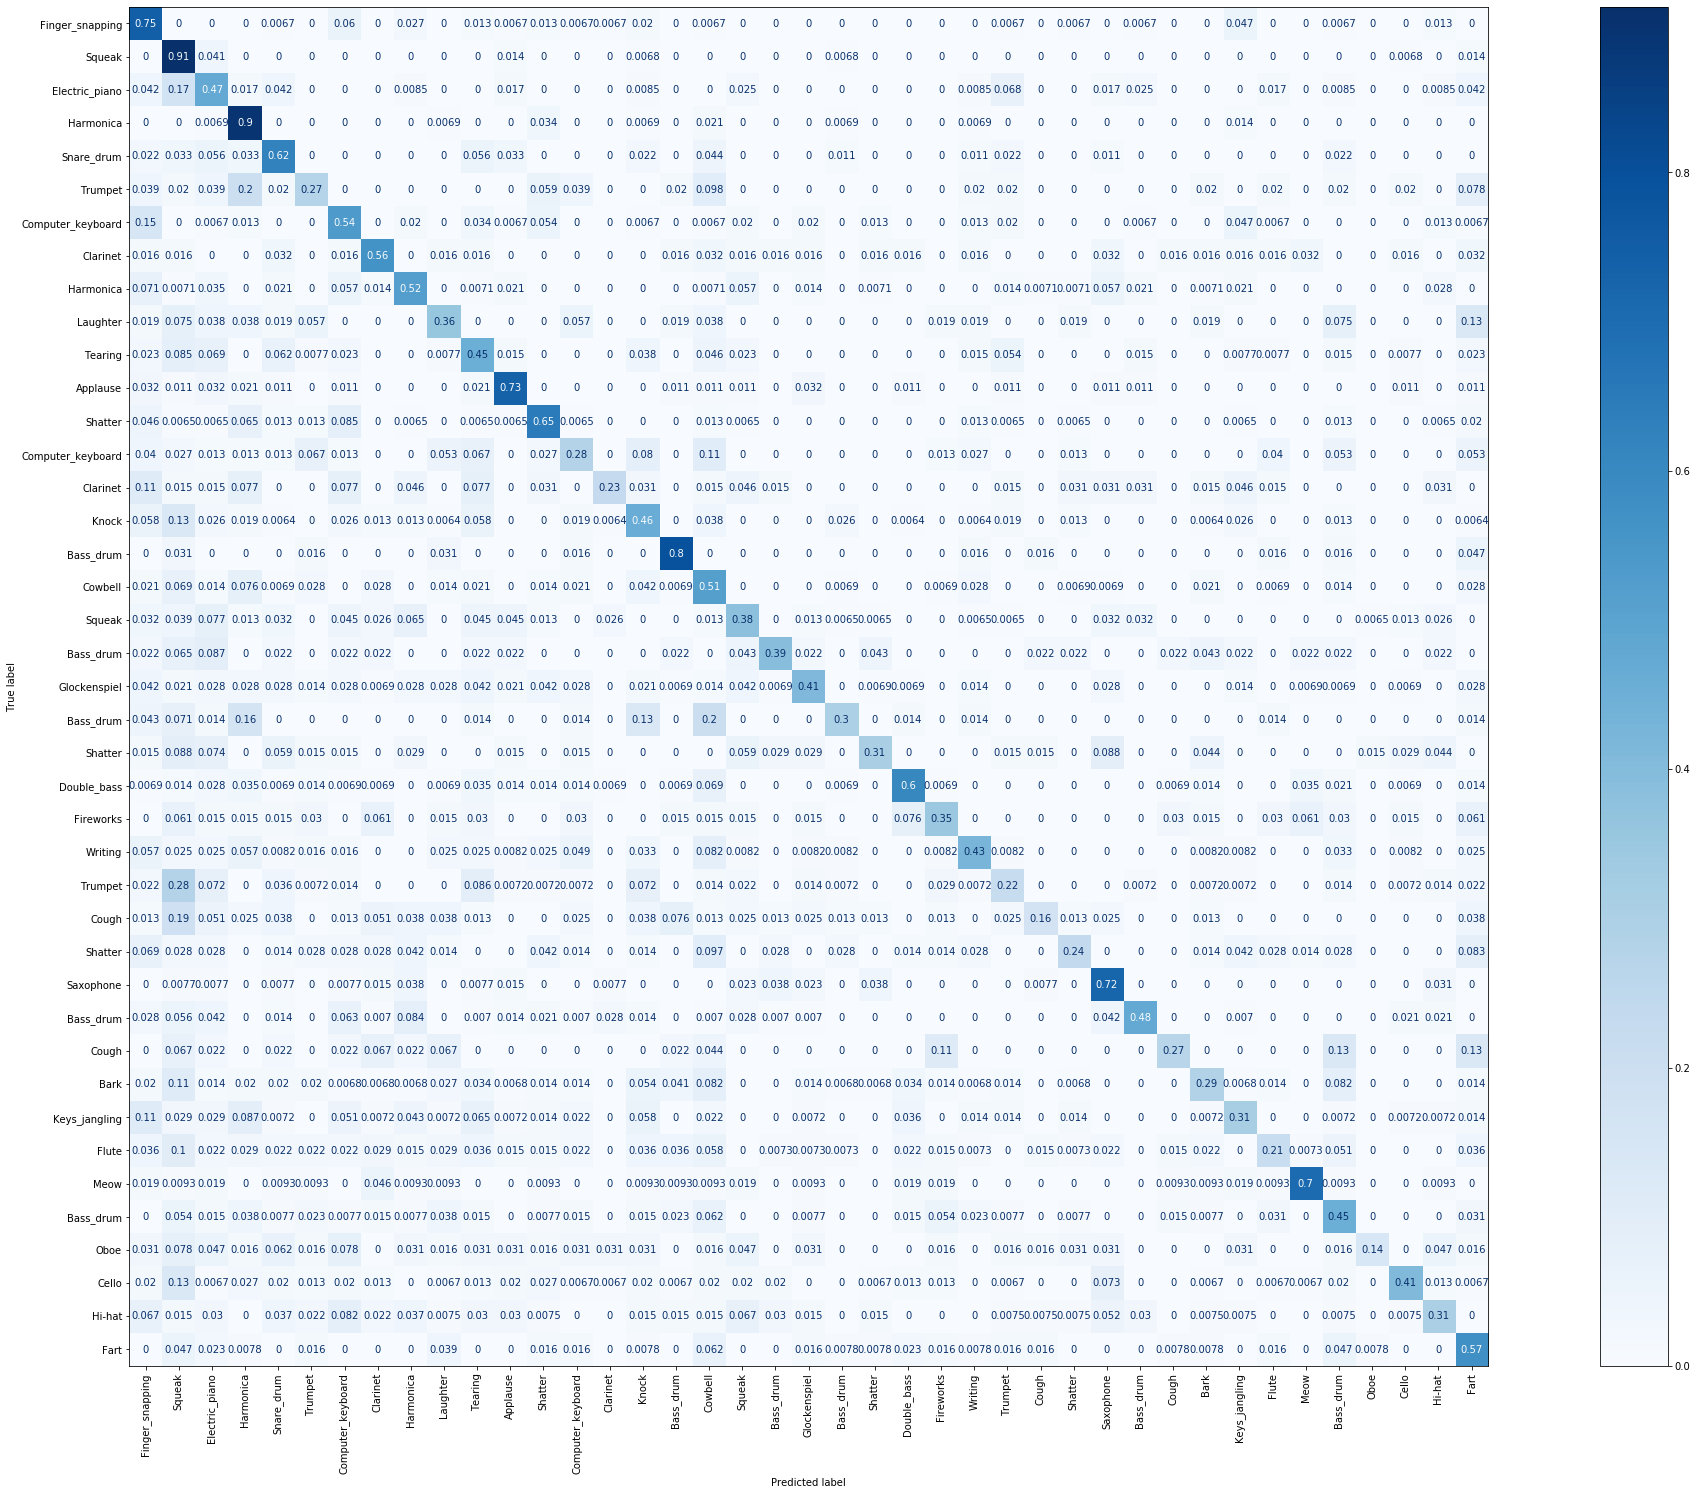

In [32]:
np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier , train_data, train_label, display_labels=label,
                             cmap=plt.cm.Blues, xticks_rotation='vertical',
                             normalize='true') 

print(disp.confusion_matrix)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()